In [12]:
%matplotlib inline
from __future__ import division
import csv
#matplotlib.use('Agg')
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand

##To simlify: J = k_B = 1 ----- J>0 to make it ferromagnetic

# Intitialize the XY network
def Init_theta(N):
    return np.random.rand(N, N, N, N)*np.pi   ### range is -pi to pi
    #return np.ones([L, L])

def Init_theta1(N):
    return np.random.rand(N, N, N, N)*np.pi  ### range is -pi to pi
    #return np.ones([L, L])
    
def Init_theta2(N):
    return np.random.rand(N, N, N, N)*2*np.pi  ### range is -pi to pi
    #return np.ones([L, L])
    
def mcmove(config,config1,config2, beta, N):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
            for k in range(N):
                for w in range(N):
                    a = np.random.randint(0, N)    ### x
                    b = np.random.randint(0, N)    ### y 
                    c = np.random.randint(0, N)    ### z
                    d = np.random.randint(0, N)    ### w
                
                    S0 =  config[a, b, c, d]
                    S1 =  config1[a, b, c, d]
                    S2 =  config2[a, b, c, d]
                    
                    x0 = np.cos(S0)
                    x1 = (np.sin(S0)*np.cos(S1))
                    x2 = (np.sin(S0)*np.sin(S1)*np.cos(S2))
                    x3 = (np.sin(S0)*np.sin(S1)*np.sin(S2))

                
                    ##### energy for all nearest-neighbors
                    nb1 = x0*np.cos(config[(a+1)%N, b, c, d]) + \
                          x1*(np.sin(config[(a+1)%N, b, c, d])*np.cos(config1[(a+1)%N, b, c, d])) + \
                          x2*(np.sin(config[(a+1)%N, b, c, d])*np.sin(config1[(a+1)%N, b, c, d])*np.cos(config2[(a+1)%N, b, c, d])) + \
                            x3*(np.sin(config[(a+1)%N, b, c, d])*np.sin(config1[(a+1)%N, b, c, d])*np.sin(config2[(a+1)%N, b, c, d])) 

                    nb2 = x0*np.cos(config[(a-1)%N, b, c, d]) + \
                        x1*(np.sin(config[(a-1)%N, b, c, d])*np.cos(config1[(a-1)%N, b, c, d])) + \
                        x2*(np.sin(config[(a-1)%N, b, c, d])*np.sin(config1[(a-1)%N, b, c, d])*np.cos(config2[(a-1)%N, b, c, d])) + \
                        x3*(np.sin(config[(a-1)%N, b, c, d])*np.sin(config1[(a-1)%N, b, c, d])*np.sin(config2[(a-1)%N, b, c, d]))

                    nb3 = x0*np.cos(config[a, (b+1)%N, c, d]) + \
                        x1*(np.sin(config[a, (b+1)%N, c, d])*np.cos(config1[a, (b+1)%N, c, d])) + \
                        x2*(np.sin(config[a, (b+1)%N, c, d])*np.sin(config1[a, (b+1)%N, c, d])*np.cos(config2[a, (b+1)%N, c, d])) + \
                        x3*(np.sin(config[a, (b+1)%N, c, d])*np.sin(config1[a, (b+1)%N, c, d])*np.sin(config2[a, (b+1)%N, c, d]))

                    nb4 = x0*np.cos(config[a, (b-1)%N, c, d]) + \
                        x1*(np.sin(config[a, (b-1)%N, c, d])*np.cos(config1[a, (b-1)%N, c, d])) + \
                        x2*(np.sin(config[a, (b-1)%N, c, d])*np.sin(config1[a, (b-1)%N, c, d])*np.cos(config2[a, (b-1)%N, c, d])) + \
                        x3*(np.sin(config[a, (b-1)%N, c, d])*np.sin(config1[a, (b-1)%N, c, d])*np.sin(config2[a, (b-1)%N, c, d]))
                        
                    nb5 = x0*np.cos(config[a, b, (c+1)%N, d]) + \
                        x1*(np.sin(config[a, b, (c+1)%N, d])*np.cos(config1[a, b, (c+1)%N, d])) + \
                        x2*(np.sin(config[a, b, (c+1)%N, d])*np.sin(config1[a, b, (c+1)%N, d])*np.cos(config2[a, b, (c+1)%N, d])) + \
                        x3*(np.sin(config[a, b, (c+1)%N, d])*np.sin(config1[a, b, (c+1)%N, d])*np.sin(config2[a, b, (c+1)%N, d]))

                    nb6 = x0*np.cos(config[a, b, (c-1)%N, d]) + \
                        x1*(np.sin(config[a, b, (c-1)%N, d])*np.cos(config1[a, b, (c-1)%N, d])) + \
                        x2*(np.sin(config[a, b, (c-1)%N, d])*np.sin(config1[a, b, (c-1)%N, d])*np.cos(config2[a, b, (c-1)%N, d])) + \
                        x3*(np.sin(config[a, b, (c-1)%N, d])*np.sin(config1[a, b, (c-1)%N, d])*np.sin(config2[a, b, (c-1)%N, d]))

                    nb7 = x0*np.cos(config[a, b, c, (d+1)%N]) + \
                        x1*(np.sin(config[a, b, c, (d+1)%N])*np.cos(config1[a, b, c, (d+1)%N])) + \
                           x2*(np.sin(config[a, b, c, (d+1)%N])*np.sin(config1[a, b, c, (d+1)%N])*np.cos(config2[a, b, c, (d+1)%N])) + \
                            x3*(np.sin(config[a, b, c, (d+1)%N])*np.sin(config1[a, b, c, (d+1)%N])*np.sin(config2[a, b, c, (d+1)%N]))

                    nb8 = x0*np.cos(config[a, b, c, (d-1)%N]) + \
                            x1*(np.sin(config[a, b, c, (d-1)%N])*np.cos(config1[a, b, c, (d-1)%N])) + \
                           x2*(np.sin(config[a, b, c, (d-1)%N])*np.sin(config1[a, b, c, (d-1)%N])*np.cos(config2[a, b, c, (d-1)%N])) + \
                            x3*(np.sin(config[a, b, c, (d-1)%N])*np.sin(config1[a, b, c, (d-1)%N])*np.sin(config2[a, b, c, (d-1)%N]))

                    nb = - (nb1 + nb2 + nb3 + nb4 + nb5 + nb6 +  nb7 + nb8)
                ###########

 

                    new_rand0 = np.random.rand(1)*np.pi
                    new_rand1 = np.random.rand(1)*np.pi
                    new_rand2 = np.random.rand(1)*2*np.pi
            
                    flips0 = new_rand0
                    flips1 = new_rand1 #S1#new_rand1
                    flips2 = new_rand2
                    
                    fx0 = np.cos(flips0)
                    fx1 = (np.sin(flips0)*np.cos(flips1))
                    fx2 = (np.sin(flips0)*np.sin(flips1)*np.cos(flips2))
                    fx3 = (np.sin(flips0)*np.sin(flips1)*np.sin(flips2))
                      
                    ##### energy for all nearest-neighbors   (AFTER FLIP)
                    nb1_f = fx0*np.cos(config[(a+1)%N, b, c, d]) + \
                          fx1*(np.sin(config[(a+1)%N, b, c, d])*np.cos(config1[(a+1)%N, b, c, d])) + \
                          fx2*(np.sin(config[(a+1)%N, b, c, d])*np.sin(config1[(a+1)%N, b, c, d])*np.cos(config2[(a+1)%N, b, c, d])) + \
                            fx3*(np.sin(config[(a+1)%N, b, c, d])*np.sin(config1[(a+1)%N, b, c, d])*np.sin(config2[(a+1)%N, b, c, d])) 

                    nb2_f = x0*np.cos(config[(a-1)%N, b, c, d]) + \
                        fx1*(np.sin(config[(a-1)%N, b, c, d])*np.cos(config1[(a-1)%N, b, c, d])) + \
                        fx2*(np.sin(config[(a-1)%N, b, c, d])*np.sin(config1[(a-1)%N, b, c, d])*np.cos(config2[(a-1)%N, b, c, d])) + \
                        fx3*(np.sin(config[(a-1)%N, b, c, d])*np.sin(config1[(a-1)%N, b, c, d])*np.sin(config2[(a-1)%N, b, c, d]))

                    nb3_f = fx0*np.cos(config[a, (b+1)%N, c, d]) + \
                        fx1*(np.sin(config[a, (b+1)%N, c, d])*np.cos(config1[a, (b+1)%N, c, d])) + \
                        fx2*(np.sin(config[a, (b+1)%N, c, d])*np.sin(config1[a, (b+1)%N, c, d])*np.cos(config2[a, (b+1)%N, c, d])) + \
                        fx3*(np.sin(config[a, (b+1)%N, c, d])*np.sin(config1[a, (b+1)%N, c, d])*np.sin(config2[a, (b+1)%N, c, d]))

                    nb4_f = fx0*np.cos(config[a, (b-1)%N, c, d]) + \
                        fx1*(np.sin(config[a, (b-1)%N, c, d])*np.cos(config1[a, (b-1)%N, c, d])) + \
                        fx2*(np.sin(config[a, (b-1)%N, c, d])*np.sin(config1[a, (b-1)%N, c, d])*np.cos(config2[a, (b-1)%N, c, d])) + \
                        fx3*(np.sin(config[a, (b-1)%N, c, d])*np.sin(config1[a, (b-1)%N, c, d])*np.sin(config2[a, (b-1)%N, c, d]))
                        
                    nb5_f = fx0*np.cos(config[a, b, (c+1)%N, d]) + \
                        fx1*(np.sin(config[a, b, (c+1)%N, d])*np.cos(config1[a, b, (c+1)%N, d])) + \
                        fx2*(np.sin(config[a, b, (c+1)%N, d])*np.sin(config1[a, b, (c+1)%N, d])*np.cos(config2[a, b, (c+1)%N, d])) + \
                        fx3*(np.sin(config[a, b, (c+1)%N, d])*np.sin(config1[a, b, (c+1)%N, d])*np.sin(config2[a, b, (c+1)%N, d]))

                    nb6_f = fx0*np.cos(config[a, b, (c-1)%N, d]) + \
                        fx1*(np.sin(config[a, b, (c-1)%N, d])*np.cos(config1[a, b, (c-1)%N, d])) + \
                        fx2*(np.sin(config[a, b, (c-1)%N, d])*np.sin(config1[a, b, (c-1)%N, d])*np.cos(config2[a, b, (c-1)%N, d])) + \
                        fx3*(np.sin(config[a, b, (c-1)%N, d])*np.sin(config1[a, b, (c-1)%N, d])*np.sin(config2[a, b, (c-1)%N, d]))

                    nb7_f = fx0*np.cos(config[a, b, c, (d+1)%N]) + \
                        fx1*(np.sin(config[a, b, c, (d+1)%N])*np.cos(config1[a, b, c, (d+1)%N])) + \
                           fx2*(np.sin(config[a, b, c, (d+1)%N])*np.sin(config1[a, b, c, (d+1)%N])*np.cos(config2[a, b, c, (d+1)%N])) + \
                            fx3*(np.sin(config[a, b, c, (d+1)%N])*np.sin(config1[a, b, c, (d+1)%N])*np.sin(config2[a, b, c, (d+1)%N]))

                    nb8_f = fx0*np.cos(config[a, b, c, (d-1)%N]) + \
                            fx1*(np.sin(config[a, b, c, (d-1)%N])*np.cos(config1[a, b, c, (d-1)%N])) + \
                           fx2*(np.sin(config[a, b, c, (d-1)%N])*np.sin(config1[a, b, c, (d-1)%N])*np.cos(config2[a, b, c, (d-1)%N])) + \
                            fx3*(np.sin(config[a, b, c, (d-1)%N])*np.sin(config1[a, b, c, (d-1)%N])*np.sin(config2[a, b, c, (d-1)%N]))


                    nb_f = - (nb1_f + nb2_f + nb3_f + nb4_f + nb5_f + nb6_f +  nb7_f + nb8_f)
                    ###########


                       
                    cost = nb_f - nb
                    #if cost < 0:
                    if nb_f < nb: 
                        S0 = flips0
                        S1 = flips1
                        S2 = flips2
                    elif rand() < np.exp(-cost*beta):
                        S0 = flips0
                        S1 = flips1
                        S2 = flips2
                        
                    config[a, b, c, d] = S0
                    config1[a, b, c, d] = S1
                    config2[a, b, c, d] = S2
                
    return config, config1, config2
    #return

def calcEnergy(config,config1,config2, N):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            for k in range(len(config)):
                for w in range(len(config)):
                    
                    S0 = config[i,j, k , w]
                    S1 = config1[i,j, k , w]
                    S2 = config2[i,j, k , w]
            
                    x0 = np.cos(S0)
                    x1 = (np.sin(S0)*np.cos(S1))
                    x2 = (np.sin(S0)*np.sin(S1)*np.cos(S2))
                    x3 = (np.sin(S0)*np.sin(S1)*np.sin(S2))
                    
                    nb1 = x0*np.cos(config[(i+1)%N, j, k, w]) + \
                        x1*(np.sin(config[(i+1)%N, j, k, w])*np.cos(config1[(i+1)%N, j, k, w])) + \
                        x2*(np.sin(config[(i+1)%N, j, k, w])*np.sin(config1[(i+1)%N, j, k, w])*np.cos(config2[(i+1)%N, j, k, w])) + \
                        x3*(np.sin(config[(i+1)%N, j, k, w])*np.sin(config1[(i+1)%N, j, k, w])*np.sin(config2[(i+1)%N, j, k, w]))

                    nb2 = x0*np.cos(config[(i-1)%N, j, k, w]) + \
                        x1*(np.sin(config[(i-1)%N, j, k, w])*np.cos(config1[(i-1)%N, j, k, w])) + \
                        x2*(np.sin(config[(i-1)%N, j, k, w])*np.sin(config1[(i-1)%N, j, k, w])*np.cos(config2[(i-1)%N, j, k, w])) + \
                        x3*(np.sin(config[(i-1)%N, j, k, w])*np.sin(config1[(i-1)%N, j, k, w])*np.sin(config2[(i-1)%N, j, k, w]))

                    nb3 = x0*np.cos(config[i, (j+1)%N, k, w]) + \
                        x1*(np.sin(config[i, (j+1)%N, k, w])*np.cos(config1[i, (j+1)%N, k, w])) + \
                        x2*(np.sin(config[i, (j+1)%N, k, w])*np.sin(config1[i, (j+1)%N, k, w])*np.cos(config2[i, (j+1)%N, k, w])) + \
                        x3*(np.sin(config[i, (j+1)%N, k, w])*np.sin(config1[i, (j+1)%N, k, w])*np.sin(config2[i, (j+1)%N, k, w]))

                    nb4 = x0*np.cos(config[i, (j-1)%N, k, w]) + \
                        x1*(np.sin(config[i, (j-1)%N, k, w])*np.cos(config1[i, (j-1)%N, k, w])) + \
                        x2*(np.sin(config[i, (j-1)%N, k, w])*np.sin(config1[i, (j-1)%N, k, w])*np.cos(config2[i, (j-1)%N, k, w])) + \
                        x3*(np.sin(config[i, (j-1)%N, k, w])*np.sin(config1[i, (j-1)%N, k, w])*np.sin(config2[i, (j-1)%N, k, w]))

                    nb5 = x0*np.cos(config[i, j, (k+1)%N, w]) + \
                        x1*(np.sin(config[i, j, (k+1)%N, w])*np.cos(config1[i, j, (k+1)%N, w])) + \
                        x2*(np.sin(config[i, j, (k+1)%N, w])*np.sin(config1[i, j, (k+1)%N, w])*np.cos(config2[i, j, (k+1)%N, w])) + \
                        x3*(np.sin(config[i, j, (k+1)%N, w])*np.sin(config1[i, j, (k+1)%N, w])*np.sin(config2[i, j, (k+1)%N, w]))

                    nb6 = x0*np.cos(config[i, j, (k-1)%N, w]) + \
                        x1*(np.sin(config[i, j, (k-1)%N, w])*np.cos(config1[i, j, (k-1)%N, w])) + \
                        x2*(np.sin(config[i, j, (k-1)%N, w])*np.sin(config1[i, j, (k-1)%N, w])*np.cos(config2[i, j, (k-1)%N, w])) + \
                        x3*(np.sin(config[i, j, (k-1)%N, w])*np.sin(config1[i, j, (k-1)%N, w])*np.sin(config2[i, j, (k-1)%N, w]))

                    nb7 = x0*np.cos(config[i, j, k, (w+1)%N]) + \
                        x1*(np.sin(config[i, j, k, (w+1)%N])*np.cos(config1[i, j, k, (w+1)%N])) + \
                        x2*(np.sin(config[i, j, k, (w+1)%N])*np.sin(config1[i, j, k, (w+1)%N])*np.cos(config2[i, j, k, (w+1)%N])) + \
                        x3*(np.sin(config[i, j, k, (w+1)%N])*np.sin(config1[i, j, k, (w+1)%N])*np.sin(config2[i, j, k, (w+1)%N]))

                    nb8 = x0*np.cos(config[i, j, k, (w-1)%N]) + \
                         x1*(np.sin(config[i, j, k, (w-1)%N])*np.cos(config1[i, j, k, (w-1)%N])) + \
                         x2*(np.sin(config[i, j, k, (w-1)%N])*np.sin(config1[i, j, k, (w-1)%N])*np.cos(config2[i, j, k, (w-1)%N])) + \
                        x3*(np.sin(config[i, j, k, (w-1)%N])*np.sin(config1[i, j, k, (w-1)%N])*np.sin(config2[i, j, k, (w-1)%N]))

                    nb = (nb1 + nb2 + nb3 + nb4 + nb5 + nb6 + nb7 + nb8)
                    
                    energy = energy - nb

    return energy*0.5/N**4

def calcMag(config, config1,config2, N):
    '''Magnetization of a given configuration'''
    magw = np.sum(np.cos(config))
    magx = np.sum(np.multiply(np.sin(config),np.cos(config1)))
    magy = np.sum(np.multiply(np.multiply(np.sin(config),np.sin(config1)),np.cos(config2)))
    magz = np.sum(np.multiply(np.multiply(np.sin(config),np.sin(config1)),np.sin(config2)))
    
    mag = np.array([magw, magx,magy,magz])
    
    return LA.norm(mag)/N**4


'''HELICITY IS IMPORTANT TO DETERMINE BKT TRANSITION:'''
'''BUT I AM NOT CALCULATING IT CORRECTLY'''
'''Do not use this function'''
def calcHelicity(config, config1,config2, N):
    
    ee_wx, ss_wx = 0, 0
    ee_wy, ss_wy = 0, 0
    ee_wz, ss_wz = 0, 0
    ee_xz, ss_xz = 0, 0
    ee_yz, ss_yz = 0, 0
    ee_xy, ss_xy = 0, 0
    
    phi_wx_plane = np.zeros((N, N, N, N))
    phi_wy_plane = np.zeros((N, N, N, N))
    phi_wz_plane = np.zeros((N, N, N, N))
    phi_xy_plane = np.zeros((N, N, N, N))
    phi_xz_plane = np.zeros((N, N, N, N))
    phi_yz_plane = np.zeros((N, N, N, N))
    
    for i in range(len(config)):
        for j in range(len(config)):
            for k in range(len(config)):
                for w in range(len(config)):
                    
                    S0 = config[i,j, k , w]
                    S1 = config1[i,j, k , w]
                    S2 = config2[i,j, k , w]
            
                    x0 = np.cos(S0)
                    x1 = (np.sin(S0)*np.cos(S1))
                    x2 = (np.sin(S0)*np.sin(S1)*np.cos(S2))
                    x3 = (np.sin(S0)*np.sin(S1)*np.sin(S2))
                    uu = [ [x0], [x1], [x2], [x3] ] 
                    
                    #n_wx = [0,0,1,1]
                    #n_wy = [0,1,0,1]
                    #n_wz = [0,1,1,0]
                                  
                    #proj_normal_wx = np.dot(uu, n_wx)/np.dot(n_wx, n_wx)*n_wx
                    #uu_projplane_wx = uu - proj_normal_wx
                    #uu_projplane_wx0[i,j,k,w] = uu_projplane_wx[0]
                    #uu_projplane_wx1[i,j,k,w] = uu_projplane_wx[1]
                    #uu_projplane_wx2[i,j,k,w] =  uu_projplane_wx[2]
                    #uu_projplane_wx3[i,j,k,w] =  uu_projplane_wx[3]
                    
                    mat_wx = np.matrix([[1, 0, 0, 0 ], [0 ,1 ,0 ,0 ],[0 ,0 ,0, 0] , [0, 0 ,0, 0]])
                    mat_wy = np.matrix([[1 ,0 ,0 ,0 ], [0, 0 ,0 ,0], [0, 0, 1 ,0],  [0, 0 ,0, 0] ])
                    mat_wz = np.matrix([[1, 0, 0, 0 ], [0 ,0, 0, 0] ,[0, 0 ,0 ,0] , [0, 0, 0, 1] ])
                    
                    mat_xy = np.matrix([[0, 0, 0, 0 ], [0 ,1, 0, 0] ,[0, 0 ,1 ,0] , [0, 0, 0, 0] ])
                    mat_xz = np.matrix([[0, 0, 0, 0 ], [0 ,1, 0, 0] ,[0, 0 ,0 ,0] , [0, 0, 0, 1] ])
                    mat_yz = np.matrix([[0, 0, 0, 0 ], [0 ,0, 0, 0] ,[0, 0 ,1 ,0] , [0, 0, 0, 1] ])
                    
                    u_wx_plane = mat_wx*uu
                    u_wy_plane = mat_wy*uu
                    u_wz_plane = mat_wz*uu
                    
                    u_xy_plane = mat_xy*uu
                    u_xz_plane = mat_xz*uu
                    u_yz_plane = mat_yz*uu
                    
                    phi_wx_plane[i,j,k,w] = np.arctan2(u_wx_plane[1],u_wx_plane[0])
                    phi_wy_plane[i,j,k,w] = np.arctan2(u_wy_plane[2],u_wy_plane[0])
                    phi_wz_plane[i,j,k,w] = np.arctan2(u_wz_plane[3],u_wz_plane[0])
                    
                    phi_xy_plane[i,j,k,w] = np.arctan2(u_xy_plane[2],u_xy_plane[1])
                    phi_xz_plane[i,j,k,w] = np.arctan2(u_xz_plane[3],u_xz_plane[1])
                    phi_yz_plane[i,j,k,w] = np.arctan2(u_yz_plane[3],u_yz_plane[2])
                        
                        
    for i in range(len(config)):
        for j in range(len(config)):
            for k in range(len(config)):
                for w in range(len(config)):
                    
                    ee_wx = ee_wx + np.cos(phi_wx_plane[i,j,k,w]-phi_wx_plane[i,(j+1)%N,k,w]) + np.cos(phi_wx_plane[i,j,k,w]-phi_wx_plane[i,(j-1)%N,k,w])
                    ss_wx = ss_wx + np.sin(phi_wx_plane[i,j,k,w]-phi_wx_plane[i,(j+1)%N,k,w]) + np.sin(phi_wx_plane[i,j,k,w]-phi_wx_plane[i,(j-1)%N,k,w])

                    ee_wy = ee_wy + np.cos(phi_wy_plane[i,j,k,w]-phi_wy_plane[i,j,(k+1)%N,w]) + np.cos(phi_wy_plane[i,j,k,w]-phi_wy_plane[i,j,(k-1)%N,w])
                    ss_wy = ss_wy + np.sin(phi_wy_plane[i,j,k,w]-phi_wy_plane[i,j,(k+1)%N,w]) + np.sin(phi_wy_plane[i,j,k,w]-phi_wy_plane[i,j,(k-1)%N,w])

                    ee_wz = ee_wz + np.cos(phi_wz_plane[i,j,k,w]-phi_wz_plane[i,j,k,(w+1)%N]) + np.cos(phi_wz_plane[i,j,k,w]-phi_wz_plane[i,j,k,(w-1)%N])
                    ss_wz = ss_wz + np.sin(phi_wz_plane[i,j,k,w]-phi_wz_plane[i,j,k,(w+1)%N]) + np.sin(phi_wz_plane[i,j,k,w]-phi_wz_plane[i,j,k,(w-1)%N])

                    ee_xy = ee_xy + np.cos(phi_xy_plane[i,j,k,w]-phi_xy_plane[i,(j+1)%N,k,w]) + np.cos(phi_xy_plane[i,j,k,w]-phi_xy_plane[i,(j-1)%N,k,w])
                    ss_xy = ss_xy + np.sin(phi_xy_plane[i,j,k,w]-phi_xy_plane[i,(j+1)%N,k,w]) + np.sin(phi_xy_plane[i,j,k,w]-phi_xy_plane[i,(j-1)%N,k,w])
                    
                    ee_xz = ee_xz + np.cos(phi_xz_plane[i,j,k,w]-phi_xz_plane[i,j,k,(w+1)%N]) + np.cos(phi_xz_plane[i,j,k,w]-phi_xz_plane[i,j,k,(w-1)%N])
                    ss_xz = ss_xz + np.sin(phi_xz_plane[i,j,k,w]-phi_xz_plane[i,j,k,(w+1)%N]) + np.sin(phi_xz_plane[i,j,k,w]-phi_xz_plane[i,j,k,(w-1)%N])

                    ee_yz = ee_yz + np.cos(phi_yz_plane[i,j,k,w]-phi_yz_plane[i,j,k,(w+1)%N]) + np.cos(phi_yz_plane[i,j,k,w]-phi_yz_plane[i,j,k,(w-1)%N])
                    ss_yz = ss_yz + np.sin(phi_yz_plane[i,j,k,w]-phi_yz_plane[i,j,k,(w+1)%N]) + np.sin(phi_yz_plane[i,j,k,w]-phi_yz_plane[i,j,k,(w-1)%N])
                       
                        
    return ee_wx/2., ss_wx/2., ee_wy/2., ss_wy/2., ee_wz/2., ss_wz/2.,  ee_xy/2.,  ss_xy/2.,   ee_xz/2.,  ss_xz/2.,   ee_yz/2.,  ss_yz/2.


def MONTE_CARLO_SIMULATION(L, min_T=0.1, max_T=3.5, step_T=25, eqSteps=5000, mcSteps=80000):
#----------------------------------------------------------------------
#  INITIALIZE SIMULATION PARAMETERS
#----------------------------------------------------------------------
    outputfilename = './data/XYZW_unfrustrated_x'+ str(L)+ '+.csv'
    size_xyzw = L**4

    Energy       = np.zeros(step_T);   Magnetization  = np.zeros(step_T)
    SpecificHeat = np.zeros(step_T);   Susceptibility = np.zeros(step_T)
    T_range = np.zeros(step_T);

    by_T = (max_T - min_T)/step_T
    for step in range(step_T):
        T_range[step] = by_T + step* by_T
        
    
    
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------

    for m in range(step_T):
        E_mean = M_mean = E_sus = M_sus = 0 
        iT=1.0/T_range[m]; iT2=iT*iT;
  
        config = Init_theta(L)
        config1 = Init_theta1(L)
        config2 = Init_theta2(L)
    
        '''equilibrate'''
        for i in range(eqSteps):        
            [config,config1,config2] = mcmove(config,config1,config2, iT, L)   # Monte Carlo moves

        '''simulate'''
        for i in range(mcSteps):
            [config,config1,config2] = mcmove(config,config1,config2, iT, L) # Monte Carlo moves        
            Ene = calcEnergy(config,config1,config2, L)                      # calculate the energy
            Mag = calcMag(config,config1,config2, L)                         # calculate the magnetisation

            E_mean += Ene
            M_mean += Mag
            M_sus += (Mag*Mag) 
            E_sus += (Ene*Ene) 
     
        E_mean_thermo = E_mean/mcSteps
        M_mean_thermo = M_mean/mcSteps
        Esus_mean_thermo = E_sus/mcSteps
        Msus_mean_thermo = M_sus/mcSteps
        
        Energy[m]         =  E_mean_thermo
        Magnetization[m]  =  M_mean_thermo
        SpecificHeat[m]   = size_xyzw*(Esus_mean_thermo - E_mean_thermo**2)*iT2
        Susceptibility[m] = size_xyzw*(Msus_mean_thermo - M_mean_thermo**2)*iT
        
        
    #write data file for simulation
    outputfile=open(outputfilename,"w")
    data_file=csv.writer(outputfile, delimiter=",")
    for m in range(step_T):
        data_file.writerow([ T_range[m], Energy[m], Magnetization[m], SpecificHeat[m], Susceptibility[m]])
    outputfile.close()
    
    print('finished for L={}'.format(L))
    return T_range, Energy, Magnetization, SpecificHeat, Susceptibility



time: 85 ms


<h3> SIMULATION

In [ ]:
# 4D lattice =  L x L x L x L
%load_ext autotime

#for actual run, increase eqsteps=5000 mcSteps=80000
T_range_4, E_4, M_4, heatC_4, M_sus_4 = MONTE_CARLO_SIMULATION(L=4, step_T=32, eqSteps=500, mcSteps=1000)
T_range_6, E_6, M_6, heatC_6, M_sus_6 = MONTE_CARLO_SIMULATION(L=6, step_T=32, eqSteps=500, mcSteps=1000)
T_range_8, E_8, M_8, heatC_8, M_sus_8 = MONTE_CARLO_SIMULATION(L=8, step_T=32, eqSteps=500, mcSteps=1000)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
finished for L=4
finished for L=6


<h3> PLOTS

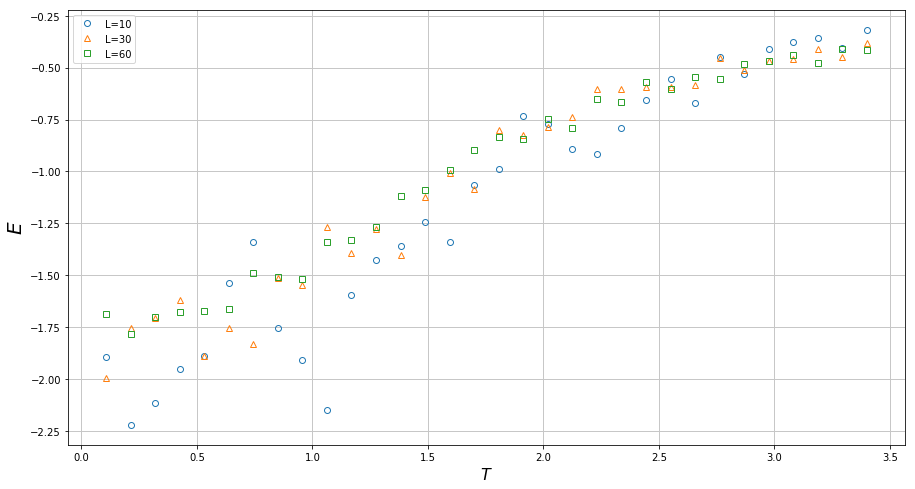

time: 447 ms


In [8]:
##PLOT ENERGY
f = plt.figure(figsize=(15, 8)); # plot the calculated values    

plt.plot(T_range_4, E_4, 'o', label='L=4', markerfacecolor='none', markeredgewidth=1.0)
plt.plot(T_range_6, E_6, '^', label='L=6', markerfacecolor='none', markeredgewidth=1.0)
plt.plot(T_range_8, E_8, 's', label='L=8', markerfacecolor='none', markeredgewidth=1.0)

plt.xlabel("$T$", fontsize=16);
plt.ylabel("$E$", fontsize=20);
plt.legend(loc='upper left')
plt.grid(True, linewidth=1, color='#c7c7c7')
plt.savefig('./plots/energy_xyzw_unfrustrated.pdf', bbox_inches="tight")
plt.show()

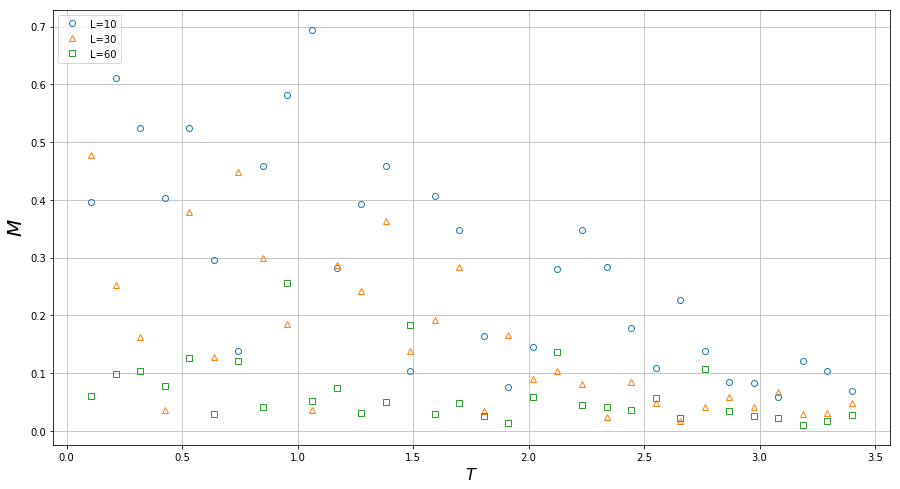

time: 307 ms


In [9]:
##PLOT MAGNETIZATION
f = plt.figure(figsize=(15, 8)); # plot the calculated values    

plt.plot(T_range_4, M_4, 'o', label='L=4', markerfacecolor='none', markeredgewidth=1.0)
plt.plot(T_range_6, M_6, '^', label='L=6', markerfacecolor='none', markeredgewidth=1.0)
plt.plot(T_range_8, M_8, 's', label='L=8', markerfacecolor='none', markeredgewidth=1.0)

plt.xlabel("$T$", fontsize=16);
plt.ylabel("$M$", fontsize=20);
plt.legend(loc='upper left')
plt.grid(True, linewidth=1, color='#c7c7c7')
plt.savefig('./plots/magnetization_xyzw_unfrustrated.pdf', bbox_inches="tight")
plt.show()

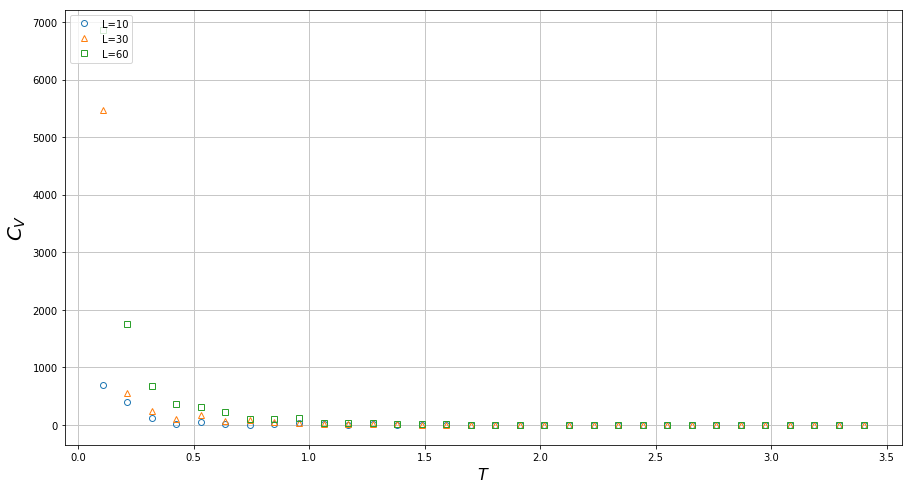

time: 290 ms


In [10]:
##PLOT HEAT CAPACITY
f = plt.figure(figsize=(15, 8)); # plot the calculated values    

plt.plot(T_range_4, heatC_4, 'o', label='L=4', markerfacecolor='none', markeredgewidth=1.0)
plt.plot(T_range_6, heatC_6, '^', label='L=6', markerfacecolor='none', markeredgewidth=1.0)
plt.plot(T_range_8, heatC_8, 's', label='L=8', markerfacecolor='none', markeredgewidth=1.0)

plt.xlabel("$T$", fontsize=16);
plt.ylabel("$C_V$", fontsize=20);
plt.legend(loc='upper left')
plt.grid(True, linewidth=1, color='#c7c7c7')
plt.savefig('./plots/heatcapacity_xyzw_unfrustrated.pdf', bbox_inches="tight")
plt.show()

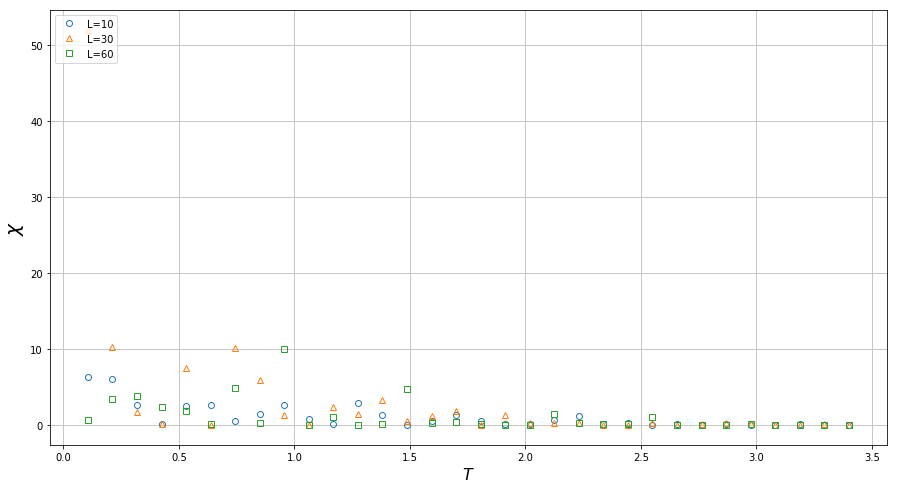

time: 258 ms


In [11]:
##PLOT SUSCEPTIBILITY
f = plt.figure(figsize=(15, 8)); # plot the calculated values    

plt.plot(T_range_4,  M_sus_4, 'o', label='L=4', markerfacecolor='none', markeredgewidth=1.0)
plt.plot(T_range_6,  M_sus_6, '^', label='L=6', markerfacecolor='none', markeredgewidth=1.0)
plt.plot(T_range_8,  M_sus_8, 's', label='L=8', markerfacecolor='none', markeredgewidth=1.0)

plt.xlabel("$T$", fontsize=16);
plt.ylabel("$\chi$", fontsize=20);
plt.legend(loc='upper left')
plt.grid(True, linewidth=1, color='#c7c7c7')
plt.savefig('./plots/susceptibility_xy_unfrustrated.pdf', bbox_inches="tight")
plt.show()